In [1]:
#coding: utf-8
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings #경고? 워닝 표시 무시하려하나보네.
warnings.filterwarnings("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup
import re

In [3]:
#크롤링할 사이트 주소 정의
source_url = "http://namu.wiki/RecentChanges"

#사이트의 html 구조에 기반하여 크롤링을 후행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [4]:
#a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)
            
#중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EB%A7%88%EC%95%BC%EB%85%B8%20%ED%83%91%EA%B1%B4
https://namu.wiki/w/%EC%A0%9C9%ED%96%89%EC%84%B1
https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%A0%81
https://namu.wiki/w/%ED%8E%98%EC%9D%B4%ED%81%AC%20%EC%B5%9C%EC%A2%85%20%EB%B3%B4%EC%8A%A4%26%EC%A7%84%20%EC%B5%9C%EC%A2%85%20%EB%B3%B4%EC%8A%A4/%EC%BA%90%EB%A6%AD%ED%84%B0
https://namu.wiki/w/%EA%B9%80%EC%9E%AC%EC%9A%B4


In [5]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

마야노 탑건 


경주마죽은 경주마1992년 출생


   은(는) 여기로 연결됩니다. '우마무스메 PRETTY DERBY'에 등장하는 캐릭터에 대한 내용은 마야노 탑건(우마무스메 PRETTY DERBY) 문서를의 번 문단을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오. JRA상 연도대표마 [ 펼치기 · 접기 ]케이슈샤상1954  하쿠료  ｜ 1955  오토키츠  ｜ 1956  메이지 히카리  ｜ 1957  하쿠 치카라  ｜ 1958  온워드 데어  ｜ 1959  윌 딜 1960  코다마  ｜ 1961  호마레보시  ｜ 1962  온슬로트  ｜ 1963  류 포렐 · 메이즈이  ｜ 1964 · 1965  신잔  ｜ 1966  코레히데  ｜ 1967  스피드 심볼리  ｜ 1968  아사카 오  ｜ 1969  타케시바 오 1970  스피드 심볼리  ｜ 1971  토메이 유슌상1972  이시노 히카루  ｜ 1973  타케 호프  ｜ 1974  키타노 카치도키  ｜ 1975   카부라야 오  ｜ 1976  토쇼 보이  ｜ 1977 텐 포인트 ｜ 1978  카네 미노부  ｜ 1979  그린 그래스 1980 · 1981  호요 보이  ｜ 1982  히카리 듀얼  ｜ 1983 미스터 시비 ｜ 1984 · 1985 심볼리 루돌프 ｜ 1986  다이

In [6]:
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)

In [7]:
#각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:
    
    #사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name='article')
    title = contents_table.find_all('h1')[0]
    
    #카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    #페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    #페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append((""))
    else:
        content_corpus_list.append("")
        
    #페이지 내 카테고리정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추출.
    #만약 없는 경우, 빈 문자열로 대체.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
        
    #모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [8]:
df.head()

,title,category,content_text
0,마야노 탑건,경주마죽은 경주마1992년 출생,은(는) 여기로 연결됩니다. '우마무스메 PRETTY DERBY'에 등장하는 ...
1,제9행성,천문학태양계행성가설 상의 천체,은(는) 여기로 연결됩니다. 2006년 8월 23일까지 태양계의 9번째 행성이...
2,한국적,대한민국의 문화북한의 문화,은(는) 여기로 연결됩니다. 대한민국의 국적(國籍)에 대한 내용은 국적법 문서...
3,페이크 최종 보스&진 최종 보스/캐릭터,캐릭터 목록,가입 후 15일이 지나야 편집 가능한 문서입니다. 상위 문서: 페이크 최종...
4,김재운,1975년 출생인하대학교 출신소방간부후보생/13기인제소방서장목포시 출신 인물,강원도 소방기관장 강원도 소방본부장 직무대리 주진복 [ 펼치기 · 접기 ]소...


In [9]:
#텍스트 정제 함수: 한글 이외의 문자는 전부 제거.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [10]:
print(text_cleaning(df['content_text'][0]))

  은는 여기로 연결됩니다 우마무스메  에 등장하는 캐릭터에 대한 내용은 마야노 탑건우마무스메   문서를의 번 문단을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오 상 연도대표마  펼치기  접기 케이슈샤상  하쿠료     오토키츠     메이지 히카리     하쿠 치카라     온워드 데어     윌 딜   코다마     호마레보시     온슬로트     류 포렐  메이즈이       신잔     코레히데     스피드 심볼리     아사카 오     타케시바 오   스피드 심볼리     토메이 유슌상  이시노 히카루     타케 호프     키타노 카치도키      카부라야 오     토쇼 보이    텐 포인트    카네 미노부     그린 그래스     호요 보이     히카리 듀얼    미스터 시비     심볼리 루돌프    다이나 걸리버상 사쿠라 스타 오   타마모 크로스   이나리 원 오구리 캡   토카이 테이오   미호노 부르봉   비와 하야히데   나리타 브라이언   마야노 탑건   사쿠라 로렐   에어 그루브   타이키 셔틀   엘 콘도르 파사 티엠 오페라 오    정글 포켓     심볼리 크리스 에스   젠노 롭 로이     딥 임팩트   어드마이어 문     보드카 부에나 비스타   오르페브르   젠틸돈나   로드 카날로아   젠틸돈

In [11]:
#각 피처마다 데이터 전처리 적용.
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['category'] = df['category'].apply(lambda x : text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x : text_cleaning(x))
df.head()

,title,category,content_text
0,마야노 탑건,경주마죽은 경주마년 출생,은는 여기로 연결됩니다 우마무스메 에 등장하는 캐릭터에 대한 내용은 마야노 탑...
1,제행성,천문학태양계행성가설 상의 천체,은는 여기로 연결됩니다 년 월 일까지 태양계의 번째 행성이었던 명왕성에 대한 내...
2,한국적,대한민국의 문화북한의 문화,은는 여기로 연결됩니다 대한민국의 국적에 대한 내용은 국적법 문서를의 번 문단을...
3,페이크 최종 보스진 최종 보스캐릭터,캐릭터 목록,가입 후 일이 지나야 편집 가능한 문서입니다 상위 문서 페이크 최종 보스진 최...
4,김재운,년 출생인하대학교 출신소방간부후보생기인제소방서장목포시 출신 인물,강원도 소방기관장 강원도 소방본부장 직무대리 주진복 펼치기 접기 소방서장...


In [12]:
#각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

마야노 탑건 제행성 한국적 페이크 최종 보스진 최종 보스캐릭터 김재운 피터 러트리 사이먼 스파이럴영화 에어 샤커 서울 버스  해수가수 루카스약속의 네버랜드 카페 스텔라와 사신의 나비 함대 컬렉션이벤트 대체역사물작품 친위대 박규정 머니게임웹예능평가 아담약속의 네버랜드 삼성 헬스 틀       주위클리 파이널 순위표 너를 찾을게 아기공룡 둘리기타 등장인물  군사독재 미호노 부르봉 표정짤 포함배제의 원리 파일서울바이브프루티앨범커버 조민규프로게이머 별의 커비 꿈의 샘 이야기 엘 콘도르 파사 스타벅스한국부산 분신슈퍼로봇대전 시리즈 박태원소방공무원   크리쳐 무제양 토카이 테이오 티엠 오페라 오 아에곤 세 유고약속의 네버랜드 투모로우바이투게더공연 카를 세 무예도보통지 야인시대합성물  리그 오브 레전드 유지애 마운트 앤 블레이드 파일 보이루 김재홍소방공무원  사이먼 도미닉 비와 하야히데 양 금모띠 제공화국드라마 김수로배우 레프트  데드 감염자 헤플리아클카나 기동전사 건담       카시야스던전 앤 파이터 추이텔 에지오포 정연신 비탈리 파라흐네비치 파일마샬 표정짤 형법 징크스리그 오브 레전드 영심이 미국병미국 진출 라데 보그다노비치 산전엘리베이터 허문회년 제트소년 마르스 이음 니지산지 방송 역사년 범국민 데이터 요금제 김현수병영일기 김근육바리에이션 딥 임팩트말 역전 잇파츠맨 


In [13]:
from konlpy.tag import Okt
from collections import Counter

In [14]:
#Konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [15]:
count

Counter({'은': 68,
         '여기': 114,
         '연결': 35,
         '우마': 40,
         '무스': 88,
         '메': 110,
         '등장': 434,
         '캐릭터': 141,
         '대한': 406,
         '내용': 343,
         '마야': 83,
         '노': 449,
         '탑건': 80,
         '를': 389,
         '번': 1991,
         '문단': 1687,
         '의': 853,
         '부분': 459,
         '참고': 131,
         '상': 122,
         '연도': 39,
         '대표': 126,
         '마': 256,
         '접기': 238,
         '케이': 35,
         '슈샤': 17,
         '하쿠료': 31,
         '오토': 50,
         '키츠': 57,
         '메이지': 101,
         '히카리': 132,
         '하쿠': 43,
         '치카라': 78,
         '워드': 47,
         '데': 207,
         '윌': 45,
         '딜': 123,
         '코다마': 68,
         '호': 361,
         '마레': 65,
         '보시': 28,
         '슬로': 57,
         '트': 186,
         '류': 272,
         '포렐': 43,
         '메이즈': 51,
         '코레': 36,
         '히데': 136,
         '스피드': 95,
         '심볼': 275,
         '리': 436,
         

In [16]:
#한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'방송': 2246, '문단': 1687, '역사': 1617, '문서': 1578, '이전': 1490, '기생': 932, '유튜브': 913, '한국': 832, '때문': 807, '이후': 752, '게임': 555, '공격': 508, '경우': 505, '정도': 471, '부분': 459, '자신': 444, '등장': 434, '다른': 431, '합의': 428, '토론': 422, '사항': 412, '대한': 406, '모습': 395, '관계': 392, '징크스': 388, '일본': 384, '시즌': 378, '시점': 377, '사람': 371, '내용': 343, '상황': 334, '사실': 323, '이상': 304, '하나': 302, '위해': 298, '전기': 286, '멤버': 282, '출연': 279, '심볼': 275, '라인': 273, '시작': 273, '평가': 265, '시리즈': 265, '공혁준': 260, '참가자': 255, '문제': 254, '사용': 254, '당시': 251, '또한': 250, '영상': 250, '가장': 249, '이름': 243, '가온': 243, '왕조': 243, '시간': 241, '레이': 239, '접기': 238, '작품': 235, '레전드': 234, '경기': 234, '모드': 234, '존재': 233, '다시': 233, '좀비': 231, '생각': 230, '능력': 229, '커비': 224, '미국': 221, '나리': 221, '상대': 219, '매우': 217, '상태': 217, '트위치': 217, '리그': 216, '보스': 215, '눈보라': 209, '유럽': 208, '사건': 207, '피해': 207, '트윗': 207, '둘리': 206, '해당': 205, '국가': 205, '체력': 205, '다만': 204, '주인공': 202, '추가': 201, '모두': 199, '관련': 196

In [17]:
#한국어 약식 불용어사전 예시 파일.
korean_stopwords_path = "C:/Users/tjoeun709-10/Documents/data/korean_stopwords.txt"

#텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [18]:
#나무위키 페이지에 맞는 불용어 추가
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [21]:
!pip install pytagcloud pygame simplejson

  Using cached pytagcloud-0.3.5.tar.gz (754 kB)
  Using cached pygame-2.0.1-cp37-cp37m-win_amd64.whl (5.2 MB)
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759867 sha256=ef061887ff6fd63f6a6aea56bb2e3ff2fa6aac41b9eeeb91ba0742cb00f0c031
  Stored in directory: c:\users\tjoeun709-10\appdata\local\pip\cache\wheels\fc\fd\aa\86956a295a7c9205bafd518ef4b6d489e51d2d476990c18238
Successfully built pytagcloud


In [19]:
import random
import pytagcloud
import webbrowser

pygame 2.0.1 (SDL 2.0.14, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [20]:
#가장 출력 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

#pytagcloud로 출력할 40개의 단어 입력. 단어 출력의 최대 크기는 80 제한.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지 생성. 폰트는 나눔 고딕
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

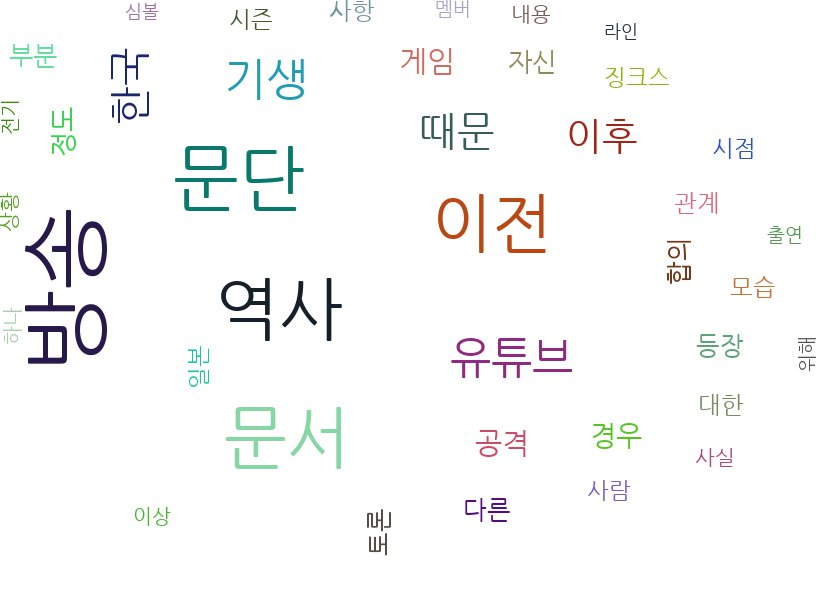

In [22]:
#생성한 이미지를 주피터 노트북상에서 출력.
from IPython.display import Image
Image(filename='wordcloud.jpg')

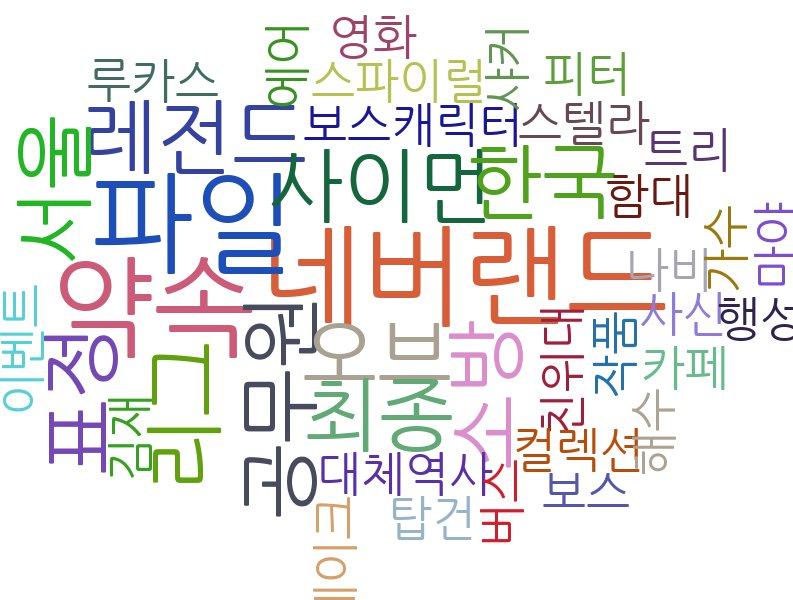

In [24]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

In [25]:
from konlpy.tag import Okt

In [26]:
t = Okt()

In [27]:
tokens_ko = t.nouns("나는 가방에 들어갈거야..가방..가방..잔짜야..진짜..진짜..진짜..진짜..오늘은 수요일이야..오늘")
tokens_ko

['나', '가방', '가방', '가방', '잔', '진짜', '진짜', '진짜', '진짜', '오늘', '수요일', '오늘']

In [28]:
import nltk

In [29]:
ko = nltk.Text(tokens_ko, name='test')

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도다.

%config InlineBackend.figure_format = 'retina'

In [31]:
import matplotlib.font_manager as fm
fontpath = 'C:/ProgramData/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name)

In [32]:
fm._rebuild()

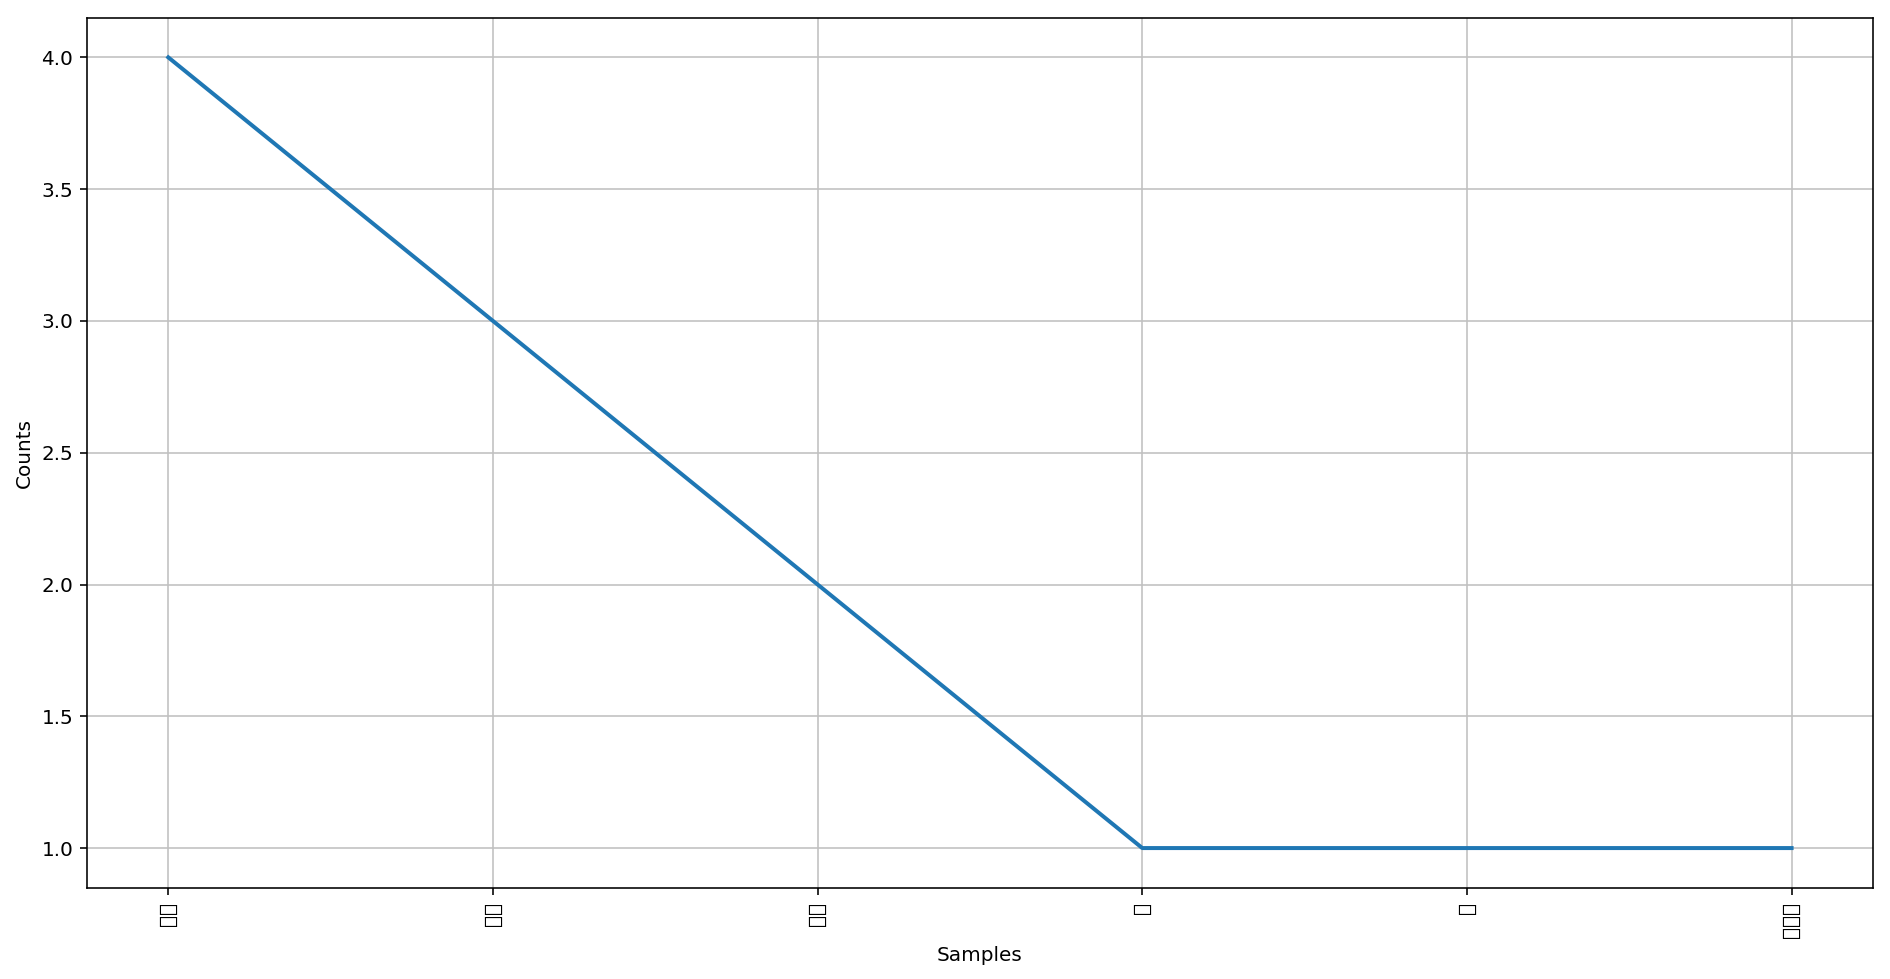

In [33]:
plt.figure(figsize=(16, 8))
ko.plot(50)
plt.show()